### Epsilon Greedy
It is a algorithm to solve a problem in which a gambler at a row of slot machines (sometimes known as "one-armed bandits") has to decide which machines to play, how many times to play each machine and in which order to play them.[3] When played, each machine provides a random reward from a probability distribution specific to that machine. The objective of the gambler is to maximize the sum of rewards earned through a sequence of lever pulls.[4][5]

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
class Bandit:
    def __init__(self, m):
        """
        param: m True mean
        """
        self.m = m # True mean which is predefined 
        self.mean = 0 # estimate of the bandit's mean
        self.N = 0
    
    def pull(self):
        return np.random.rand() + self.m
    
    def update(self, x):
        """
        param: x Latest sample received from bandit.
        """
        self.N += 1
        self.mean = (1.-1./self.N)*self.mean + 1./self.N*x

In [30]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)

    for i in range(N):
        p = np.random.random()
        if p < eps: # exploration
            j = np.random.choice(3)
        else: # exploitation
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)

    return cumulative_average


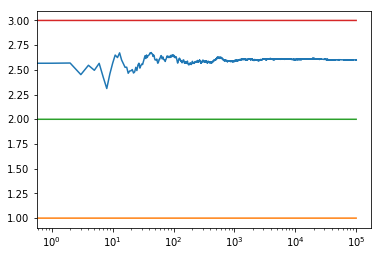

1.4983735325384542
2.5016940905239675
3.499971392747638


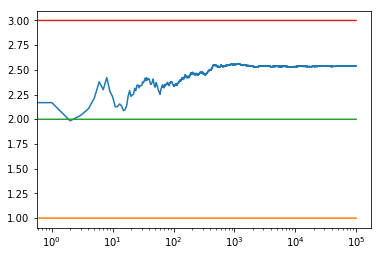

1.4994182189605518
2.496389070870236
3.5001768579765598


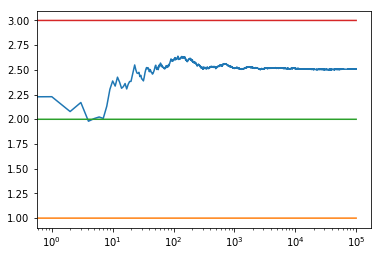

1.4991126372120631
2.4979379363736545
3.5008301327968945


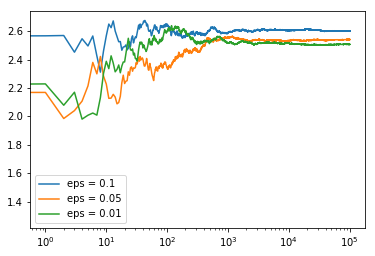

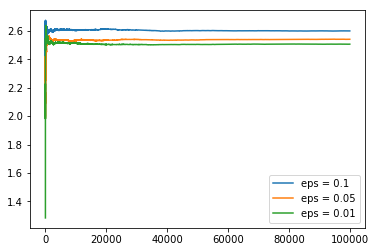

In [85]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()


# linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()
